In [255]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [539]:
loan_train = pd.read_csv('./data/Train/Train.csv', index_col='ID')
loan_test = pd.read_csv('./data/Test/Test.csv', index_col='ID')

In [1010]:
%run scripts/helper.py
%run scripts/preprocess.py
%run scripts/models.py
%run scripts/metrics.py
%run scripts/ensembling.py

In [541]:
# columns without any missing values
not_nulls = not_null_cols(loan_train)

In [542]:
# columns with type object that don't have any missing values
obj_cols = cols_with_obj_type(loan_train, not_nulls)

In [543]:
obj_cols

['Gender',
 'DOB',
 'Lead_Creation_Date',
 'Mobile_Verified',
 'Var1',
 'Filled_Form',
 'Device_Type',
 'Var2',
 'Source']

In [544]:
loan_train_processed, loan_test_processed = process(loan_train, loan_test, obj_cols)

In [545]:
loan_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87020 entries, ID000002C20 to ID124821V10
Data columns (total 25 columns):
Gender                   87020 non-null int32
City                     86017 non-null object
Monthly_Income           87020 non-null int64
DOB                      87020 non-null object
Lead_Creation_Date       87020 non-null object
Loan_Amount_Applied      86949 non-null float64
Loan_Tenure_Applied      86949 non-null float64
Existing_EMI             86949 non-null float64
Employer_Name            86949 non-null object
Salary_Account           75256 non-null object
Mobile_Verified          87020 non-null int32
Var5                     87020 non-null int64
Var1                     87020 non-null int32
Loan_Amount_Submitted    52407 non-null float64
Loan_Tenure_Submitted    52407 non-null float64
Interest_Rate            27726 non-null float64
Processing_Fee           27420 non-null float64
EMI_Loan_Submitted       27726 non-null float64
Filled_Form              87020 

## Exploratory Data Analysis

In [650]:
loan_train.DOB.isnull().any()

False

In [651]:
loan_train.Lead_Creation_Date.isnull().any()

False

In [791]:
cities = loan_train_processed.groupby(['City', 'Disbursed']).size().unstack()

In [796]:
cities.sort(columns=1, ascending=False)

Disbursed,0,1
City,,
Delhi,12258,269
Bengaluru,10645,179
Mumbai,10626,169
Pune,5086,121
Hyderabad,7188,84
Chennai,6849,67
Kolkata,2838,50
Gurgaon,1185,27
Jaipur,1307,24


In [806]:
loan_train[loan_train_processed.City.isnull()].City.head()

ID
ID022695X00    NaN
ID022708K30    NaN
ID022716S10    NaN
ID022733J30    NaN
ID022771V10    NaN
Name: City, dtype: object

In [816]:
loan_train_processed.ix[['ID022695X00', 'ID022708K30'], 'City']

ID
ID022695X00    NaN
ID022708K30    NaN
Name: City, dtype: object

In [821]:
def to_lower_case(city):
    try:
        if math.isnan(city):
            return city
        else:
            return city.lower()
    except:
        return city
    
loan_train_processed['City'] = loan_train_processed.City.map(to_lower_case)
loan_test_processed['City'] = loan_test_processed.City.map(to_lower_case)

In [823]:
# fill missing values with -1 for City
loan_train_processed.City.fillna('-1', inplace=True)
loan_test_processed.City.fillna('-1', inplace=True)

## Data preparation and Cleaning

In [824]:
# encode city names in train and test
loan_train_processed, loan_test_processed = process(loan_train_processed, loan_test_processed, ['City'])

In [546]:
# fill missing values for loan_amount_applied and loan_tenure_applied
loan_train_processed.Loan_Amount_Applied.fillna(loan_train_processed.Loan_Amount_Applied.median(), inplace=True)
loan_train_processed.Loan_Tenure_Applied.fillna(loan_train_processed.Loan_Tenure_Applied.median(), inplace=True)

loan_test_processed.Loan_Amount_Applied.fillna(loan_test_processed.Loan_Amount_Applied.median(), inplace=True)
loan_test_processed.Loan_Tenure_Applied.fillna(loan_test_processed.Loan_Tenure_Applied.median(), inplace=True)

In [755]:
# fill missing values for loan_amount_applied and loan_tenure_applied
loan_train_processed.Loan_Amount_Submitted.fillna(loan_train_processed.Loan_Amount_Submitted.median(), inplace=True)
loan_train_processed.Loan_Tenure_Submitted.fillna(loan_train_processed.Loan_Tenure_Submitted.median(), inplace=True)

loan_test_processed.Loan_Amount_Submitted.fillna(loan_test_processed.Loan_Amount_Submitted.median(), inplace=True)
loan_test_processed.Loan_Tenure_Submitted.fillna(loan_test_processed.Loan_Tenure_Submitted.median(), inplace=True)

In [547]:
# normalize the monthly income variable
loan_train_processed['Monthly_Income'] = np.log1p(loan_train_processed.Monthly_Income)
loan_test_processed['Monthly_Income'] = np.log1p(loan_test_processed.Monthly_Income)

In [548]:
# fill missing values for existing emis
loan_train_processed.Existing_EMI.fillna(loan_train_processed.Existing_EMI.median(), inplace=True)
loan_test_processed.Existing_EMI.fillna(loan_test_processed.Existing_EMI.median(), inplace=True)

In [549]:
# normalize loan applied amount
loan_train_processed['Loan_Amount_Applied'] = np.log1p(loan_train_processed.Loan_Amount_Applied)
loan_test_processed['Loan_Amount_Applied'] = np.log1p(loan_test_processed.Loan_Amount_Applied)

In [756]:
# normalize loan applied amount
loan_train_processed['Loan_Amount_Submitted'] = np.log1p(loan_train_processed.Loan_Amount_Submitted)
loan_test_processed['Loan_Amount_Submitted'] = np.log1p(loan_test_processed.Loan_Amount_Submitted)

In [652]:
# convert both DOB and Lead_Creation_Date to timestamp
loan_train_processed['DOB'] = pd.to_datetime(loan_train_processed.DOB)
loan_test_processed['DOB'] = pd.to_datetime(loan_test_processed.DOB)

loan_train_processed['Lead_Creation_Date'] = pd.to_datetime(loan_train_processed.Lead_Creation_Date)
loan_test_processed['Lead_Creation_Date'] = pd.to_datetime(loan_test_processed.Lead_Creation_Date)

In [664]:
loan_train_processed['age_delta'] = (loan_train_processed.Lead_Creation_Date - loan_train_processed.DOB)

In [677]:
loan_test_processed['age_delta'] = (loan_test_processed.Lead_Creation_Date - loan_test_processed.DOB)

In [672]:
def get_age_in_years(age):
    seconds = age / (1e9)
    days = seconds / (24. * 60 * 60)
    years = days / 365.
    return int(years)

loan_train_processed['age_when_applied'] = loan_train_processed.age_delta.apply(get_age_in_years)

In [678]:
loan_test_processed['age_when_applied'] = loan_test_processed.age_delta.apply(get_age_in_years)

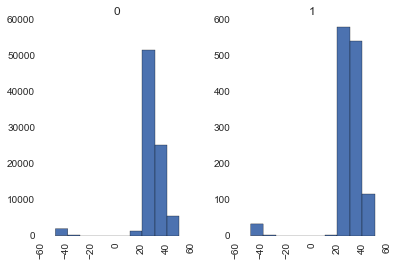

In [675]:
loan_train_processed.hist(column='age_when_applied', by='Disbursed');

In [676]:
loan_train_processed[loan_train_processed.age_when_applied < 0].head()

,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,...,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed,age_when_applying,age_delta,age_when_applied
ID,,,,,,,,,,,,,,,,,,,,,
ID000052A20,1,Mumbai,10.933125,2064-05-28,2015-05-01,13.122365,5,14500,TEJCONTROL SYSTEMS PVT LTD,HDFC Bank,...,0,1,4,10,3,0,0,-17925 days,-17925 days,-49
ID000084G40,1,Mumbai,10.714440,2050-05-20,2015-05-01,0.000000,0,0,XHZ,ICICI Bank,...,0,1,1,10,2,0,0,-12803 days,-12803 days,-35
ID000134E40,0,Dibrugarh,11.928348,2059-10-21,2015-05-01,14.508658,5,37500,B.C.DAS,Allahabad Bank,...,0,1,1,10,3,0,0,-16244 days,-16244 days,-44
ID000196O10,0,Banka,10.819798,2061-09-10,2015-05-01,12.206078,2,9507,KANCHAN KUMARI,State Bank of India,...,0,1,4,10,3,0,0,-16934 days,-16934 days,-46
ID000201T10,0,Nagpur,9.798183,2058-01-29,2015-05-01,0.000000,0,0,MUNICIPAL GIRLS HIGH SCHOOL,UCO Bank,...,1,0,2,10,5,0,0,-15614 days,-15614 days,-42


In [679]:
loan_test_processed[loan_test_processed.age_when_applied < 0].head()

,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,Salary_Account,...,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,age_delta,age_when_applied
ID,,,,,,,,,,,,,,,,,,,,,
ID000492Y20,1,SURENDERNAGAR,10.933125,2059-06-01,2015-05-01,13.815512,5,13000,BHARAT SANCHAR NIGAM LTD,IDBI Bank,...,NaN,NaN,NaN,0,1,1,30,3,-16102 days,-44
ID000862E20,1,Kolkata,10.085851,2063-03-15,2015-05-01,12.611541,4,0,WEST BENGAL STATE ELECTRICITY DISTRIBUTION LTD,United Bank of India,...,20.0,3000,9129.11,1,1,1,20,5,-17485 days,-47
ID001389L40,0,Solapur,11.512935,2053-06-01,2015-05-02,14.220976,5,0,SINHGAD INSTITUTE,Bank of Baroda,...,NaN,NaN,NaN,0,1,1,10,1,-13910 days,-38
ID001458C30,1,Guntur,11.225257,2056-08-11,2015-05-02,13.815512,4,0,PEARL BEVERAGES LTD,Yes Bank,...,NaN,NaN,NaN,0,1,1,10,3,-15077 days,-41
ID001763V30,1,Mumbai,10.434145,2057-08-17,2015-05-02,0.000000,0,0,WESTERN RAILWAY,State Bank of India,...,15.5,2650,12748.19,1,0,2,10,5,-15448 days,-42


### Model Building

In [829]:
features = loan_train_processed[['City', 'Monthly_Income','Var5', 'Loan_Amount_Applied', 'Loan_Tenure_Applied', 
                                 'Existing_EMI', 'Loan_Amount_Submitted', 'Loan_Tenure_Submitted',
                                 'Var1', 'Filled_Form', 'Device_Type', 'Var2', 'Source', 'Var5', 'age_when_applied']]

In [830]:
from sklearn.cross_validation import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(loan_train.Disbursed, n_iter=3, test_size=0.3, random_state=121)

In [831]:
train_idx, test_idx = next(iter(sss))

In [832]:
Xt = features.iloc[train_idx]
Xv = features.iloc[test_idx]

yt = loan_train.Disbursed.iloc[train_idx]
yv = loan_train.Disbursed.iloc[test_idx]

In [998]:
# Random Forest Classifier
model_rf = random_forest_classifier(Xt, yt)

In [1005]:
# Gradient Boosting Classifier
model = gradient_boosting_classifier(Xt, yt)

In [1006]:
model

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=5, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              random_state=None, subsample=0.9, verbose=0,
              warm_start=False)

In [999]:
model_rf

RandomForestClassifier(bootstrap=True, class_weight='auto', criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=350, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [1000]:
yt_pred_rf = predictions(model_rf, Xt)[:, 1]
print 'ROC AUC score on the training set for Random Forest Classifier %f ' %(score(yt, yt_pred_rf))

ROC AUC score on the training set for Random Forest Classifier 0.999957 


In [1007]:
yt_pred_gbr = predictions(model, Xt)[:, 1]
print 'ROC AUC score on the training set for GBC %f ' %(score(yt, yt_pred_gbr))

ROC AUC score on the training set for GBC 0.959655 


In [1008]:
yt_pred_ensemble = (.2 * yt_pred_rf + .8 * yt_pred_gbr)
print 'ROC AUC score on the training set for ensemble %f ' %(score(yt, yt_pred_ensemble))

ROC AUC score on the training set for ensemble 0.999434 


In [1011]:
train_blending_submission = stacked_blending(Xt.values, yt.values, Xv.values)

Creating train and test sets for blending.
0 RandomForestClassifier(bootstrap=True, class_weight='auto', criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Fold 0
[30410 30411 30412 ..., 60911 60912 60913]
Fold 1
[    0     1     2 ..., 32409 32448 32451]
1 GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              random_state=None, subsample=0.9, verbose=0,
              warm_start=False)
Fold 0
[30410 30411 30412 ..., 60911 60912 60913]
Fold 1
[    0     1     2 ..., 32409 32448 32451]

Blending.
Linear stretch of predictions to 

In [1012]:
print 'ROC score %f ' %(score(yv, train_blending_submission))

ROC score 0.832172 


### Validation set

In [1002]:
yv_pred_rf = predictions(model_rf, Xv)[:, 1]
print 'ROC AUC score on the test set for Random Forest Classifier %f ' %(score(yv, yv_pred_rf))

ROC AUC score on the test set for Random Forest Classifier 0.799125 


In [1009]:
yv_pred = predictions(model, Xv)[:, 1]
print 'ROC AUC score on the test set for GBC %f ' %(score(yv, yv_pred))

ROC AUC score on the test set for GBC 0.831386 


In [1003]:
yv_pred_ensemble = (.2 * yv_pred_rf + .8 * yv_pred)
print 'ROC AUC score on the test set for ensemble %f ' %(score(yv, yv_pred_ensemble))

ROC AUC score on the test set for ensemble 0.837055 


### Final Model

In [867]:
features_test = loan_test[['City', 'Monthly_Income','Var5', 'Loan_Amount_Applied', 'Loan_Tenure_Applied', 
                           'Existing_EMI', 'Loan_Amount_Submitted', 'Loan_Tenure_Submitted',
                           'Var1', 'Filled_Form', 'Device_Type', 'Var2', 'Source', 'Var5', 'age_when_applied']]

In [868]:
model_final_rf = random_forest_classifier(features, loan_train_processed.Disbursed)
model_final_gbr = gradient_boosting_classifier(features, loan_train_processed.Disbursed)

In [869]:
final_preds_rf = predictions(model_final_rf, features_test)[:, 1]
final_preds_gbr = predictions(model_final_gbr, features_test)[:, 1]

In [870]:
final_preds = (.2 * final_preds_rf + .8 * final_preds_gbr)

In [872]:
create_submission_file(loan_test.index.values, final_preds, 'ensemble_rf_gbr.csv')

## Feature Selection

In [615]:
%run scripts/feature_selection.py

In [616]:
feature_selection(loan_train_processed[['Monthly_Income','Var5', 'Loan_Amount_Applied', 'Loan_Tenure_Applied', 'Existing_EMI',
                                 'Var1', 'Filled_Form', 'Device_Type', 'Var2', 'Source', 'Var5']], 
                  loan_train_processed.Disbursed)

initial f1 score based on extra trees classifier:  0.00412371134021
output format:
no of features, f1-score, roc-score of class-predictions, roc-score of probabilities
1 0.0 0.499863940289 0.802303510239
2 0.0 0.499863940289 0.805410139125
3 0.0 0.499902814492 0.809634452232
4 0.0 0.499883377391 0.809360144864
5 0.0 0.499825066086 0.816016181845
6 0.0 0.499863940289 0.82175241651
7 0.0 0.499902814492 0.824952007659
8 0.0 0.499902814492 0.824952109424
9 0.0 0.499863940289 0.824926464662
10 0.0 0.499844503188 0.827811296884
f1_best: 0


In [713]:
import os

In [714]:
os.listdir('./submissions/')

['baseline.csv',
 'gbr_preds_basic.csv',
 'log_preds.csv',
 'log_preds_obj_to_int.csv',
 'rf_preds.csv',
 'rf_preds_deeper.csv',
 'rf_preds_more_estimators.csv']

In [770]:
gbr_df_basic = pd.read_csv('./submissions/gbr_preds_basic.csv')
gbr_df = pd.read_csv('./submissions/gbr_preds.csv')

In [771]:
corr_df = pd.DataFrame({'gbr_preds_basic': gbr_df_basic.Disbursed, 'gbr_preds': gbr_df.Disbursed})

In [772]:
corr_df.corr()

,gbr_preds,gbr_preds_basic
gbr_preds,1.000000,0.902021
gbr_preds_basic,0.902021,1.000000


In [783]:
corr_df.gbr_preds.head()

0    0.007192
1    0.049943
2    0.000807
3    0.000725
4    0.004493
Name: gbr_preds, dtype: float64

In [784]:
corr_df.gbr_preds_basic.head()

0    0.007244
1    0.044346
2    0.000812
3    0.000745
4    0.004462
Name: gbr_preds_basic, dtype: float64

In [785]:
average_values = ((.4 * corr_df.gbr_preds_basic) + (.6 * corr_df.gbr_preds))

In [786]:
average_values

0        0.007213
1        0.047704
2        0.000809
3        0.000733
4        0.004480
5        0.000763
6        0.064980
7        0.004886
8        0.013996
9        0.037304
10       0.000938
11       0.005848
12       0.000889
13       0.020075
14       0.001151
15       0.019186
16       0.027050
17       0.011109
18       0.025505
19       0.000741
20       0.003874
21       0.000838
22       0.000898
23       0.009534
24       0.006054
25       0.044588
26       0.023045
27       0.007610
28       0.000754
29       0.000855
           ...   
37687    0.000714
37688    0.016900
37689    0.035022
37690    0.000939
37691    0.001863
37692    0.004450
37693    0.000706
37694    0.001037
37695    0.000706
37696    0.000706
37697    0.000706
37698    0.007817
37699    0.000706
37700    0.007643
37701    0.006271
37702    0.006133
37703    0.000706
37704    0.000818
37705    0.000706
37706    0.008121
37707    0.000980
37708    0.025398
37709    0.025424
37710    0.002385
37711    0

In [787]:
create_submission_file(loan_test.index.values, average_values, 'weighted_gbr.csv')

,gbr_preds,rf_preds
gbr_preds,1.000000,0.550424
rf_preds,0.550424,1.000000


In [722]:
np.zeros((37717)).shape

(37717,)

In [ ]:
0.57 + 0.04 + 0.96 + 0.99
0.35000056 + 0.35000002 + 0.35000098 + 0.35000111

In [906]:
a = 0.57 + 0.35000056
b = 0.04 + 0.35000002
c = 0.96 + 0.35000098
d = 0.99 + 0.35000111
values = [a, b, c, d]

In [907]:
first = (a - min(values)) / (max(values) - min(values))